In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dataSetPath = 'ex1data1.txt'
# read the txt
# names添加列名，header用指定的行来作为标题，若原无标题且指定标题则设为None
data = pd.read_csv(dataSetPath,header=None,names=['Population','Profit'])
# show data
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


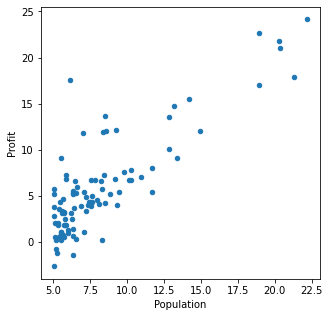

In [19]:
# show the data with a picture
data.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))
plt.show()

In [20]:
# 进行归一化
data = (data - data.mean()) / data.std()
data.head()

,Population,Profit
0,-0.529654,2.132905
1,-0.680150,0.597261
2,0.092716,1.419690
3,-0.298872,1.091575
4,-0.594333,0.178606


In [21]:
data.describe()

,Population,Profit
count,9.700000e+01,9.700000e+01
mean,-6.363753e-16,3.548135e-16
std,1.000000e+00,1.000000e+00
min,-8.095592e-01,-1.546176e+00
25%,-6.336366e-01,-6.991019e-01
50%,-4.058003e-01,-2.317195e-01
75%,1.080911e-01,2.191484e-01
max,3.628843e+00,3.322503e+00


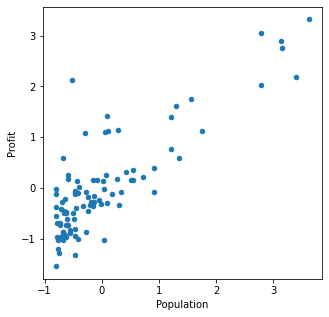

In [22]:
# show
data.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))
plt.show()

代价函数$J_\theta$:

In [23]:
def costFunction(X,y,theta):
    inner = np.power(X*theta.T-y,2)
    return np.sum(inner)/(2*len(X))

In [27]:
# 即：在第0列插入列名为Ones的值为1的一列,方便下面操作
data.insert(0,'Ones',1)


ValueError: cannot insert Ones, already exists